In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
dataa = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 20000)
dataa.head(5)

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0


In [2]:
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

<Axes: ylabel='annual_income'>

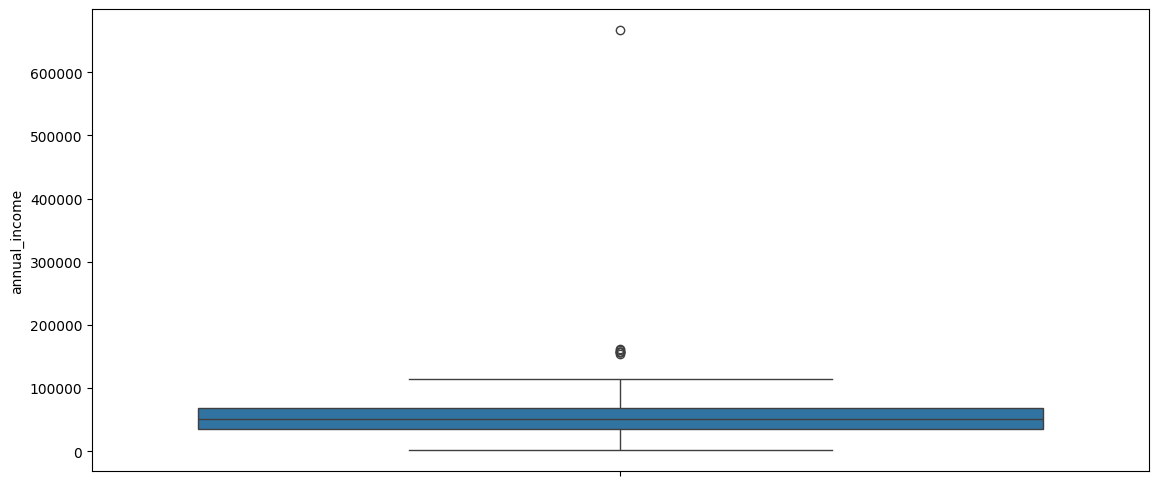

In [3]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.boxplot(dataa["annual_income"])
#outlier then median

<Axes: ylabel='num_teenagers'>

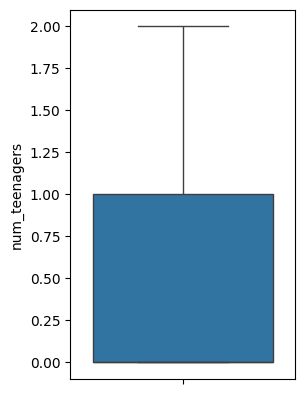

In [4]:
plt.subplot(1,2,2)
sns.boxplot(dataa["num_teenagers"])
#no outlier then mean

In [5]:
from sklearn.impute import SimpleImputer
si=SimpleImputer( strategy="median")
dataa["annual_income"]=si.fit_transform(dataa[["annual_income"]])

In [6]:
#check for missing value in annual income
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income                0
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
si=SimpleImputer( strategy="mean")
dataa["num_teenagers"]=si.fit_transform(dataa[["num_teenagers"]]).ravel().astype(int)

In [8]:
#check for missing value in num_teenagers
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income                0
num_children                 0
num_teenagers                0
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [9]:
dataa["education_level"].value_counts()
#we can see that graduation is the most repeated so we should place any missing values with graduation

education_level
Graduation    1105
PhD            474
Master         365
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [10]:
mode_value=dataa["education_level"].mode()[0]
mode_value

'Graduation'

In [11]:
dataa["education_level"]=dataa["education_level"].fillna(mode_value)

In [12]:
dataa.isnull().sum()
#now we don't have any null values


customer_id                 0
birth_year                  0
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_campaign_1         0
accepted_campaign_2         0
accepted_campaign_3         0
accepted_campaign_4         0
accepted_campaign_5         0
accepted_last_campaign      0
dtype: int64

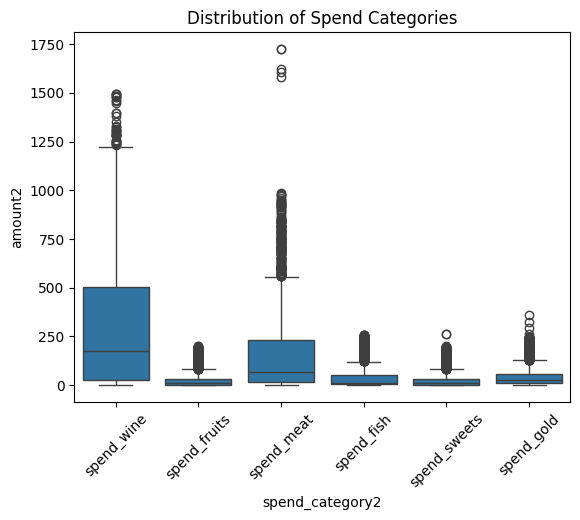

In [13]:
cols = ['spend_wine','spend_fruits','spend_meat','spend_fish','spend_sweets','spend_gold']
df_melt2 = dataa[cols].melt(var_name='spend_category2', value_name='amount2')
sns.boxplot(x='spend_category2', y='amount2', data=df_melt2)
plt.xticks(rotation=45)
plt.title('Distribution of Spend Categories')
plt.show()

In [14]:
#manage correlations
dataa.describe()["spend_wine"]


count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: spend_wine, dtype: float64

In [15]:
Q1=dataa.describe()["spend_wine"]["25%"]
Q3=dataa.describe()["spend_wine"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_wine"]=dataa["spend_wine"].clip(lower_limit,upper_limit)


In [16]:
Q1=dataa.describe()["spend_fruits"]["25%"]
Q3=dataa.describe()["spend_fruits"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_fruits"]=dataa["spend_fruits"].clip(lower_limit,upper_limit)

In [17]:
Q1=dataa.describe()["spend_meat"]["25%"]
Q3=dataa.describe()["spend_meat"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_meat"]=dataa["spend_meat"].clip(lower_limit,upper_limit)

In [18]:
Q1=dataa.describe()["spend_fish"]["25%"]
Q3=dataa.describe()["spend_fish"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_fish"]=dataa["spend_fish"].clip(lower_limit,upper_limit)

In [19]:
Q1=dataa.describe()["spend_sweets"]["25%"]
Q3=dataa.describe()["spend_sweets"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_sweets"]=dataa["spend_sweets"].clip(lower_limit,upper_limit)

In [20]:
Q1=dataa.describe()["spend_gold"]["25%"]
Q3=dataa.describe()["spend_gold"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["spend_gold"]=dataa["spend_gold"].clip(lower_limit,upper_limit)

In [21]:
Q1=dataa.describe()["annual_income"]["25%"]
Q3=dataa.describe()["annual_income"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["annual_income"]=dataa["annual_income"].clip(lower_limit,upper_limit)

In [22]:
#Encoding nominal(no order) and ordinal(order)
#Educational level is ordinal order:( Basic,2 n cycle,Graduation,Master,PhD)
#Marital Status is nominal

In [23]:
#Encoding MaritalStatus (Nominal)
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(dataa[["marital_status"]])
new_dataa=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(["marital_status"]))
#new_dataa


In [24]:
#now we want to remove the marital status column and insert instead the encoded one

In [25]:
dataa.drop(columns=["marital_status"],inplace=True)
one_hot_encoded=pd.concat((dataa,new_dataa),axis=1)
dataa=one_hot_encoded
#dataa

In [26]:
#Encoding educational level (ordinal)
encoder=OrdinalEncoder(categories=[["Basic","2n Cycle","Graduation","Master","PhD"]])
encoder_edu=encoder.fit_transform(one_hot_encoded[["education_level"]])
edu_dataa= pd.DataFrame(encoder_edu, columns=["education_level_encoded"])

In [27]:
one_hot_encoded.drop(columns=["education_level"],inplace=True)
#one_hot_encoded

In [28]:
dataa=pd.concat((one_hot_encoded,edu_dataa),axis=1)

In [29]:
dataa['age'] = 2025 - dataa['birth_year']

In [30]:
dataa = dataa.drop(columns=['birth_year'])
dataa = dataa.drop(columns=['customer_id'])
dataa = dataa.drop(columns=['signup_date'])
dataa.head(5)

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_level_encoded,age
0,58138.0,0,0,58,0,635,81,546,120.5,81,88.0,3,8,10,4,7,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,68
1,46344.0,1,1,38,0,11,1,6,2.0,1,6.0,2,1,1,2,5,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,71
2,71613.0,0,0,26,0,426,49,127,111.0,21,42.0,1,8,2,10,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,60
3,26646.0,1,0,26,0,11,4,20,10.0,3,5.0,2,2,0,4,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,41
4,58293.0,1,0,94,0,173,43,118,46.0,27,15.0,5,5,3,6,5,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,44


In [31]:
features = ['annual_income','num_children','num_teenagers',
    'days_since_last_purchase','has_recent_complaint',
    'spend_wine','spend_fruits','spend_meat','spend_fish',
    'spend_sweets','spend_gold','num_discount_purchases',
    'num_web_purchases','num_catalog_purchases',
    'num_store_purchases','web_visits_last_month',
    'education_level_encoded','marital_status_Absurd',
    'marital_status_Alone','marital_status_Divorced',
    'marital_status_Married','marital_status_Single',
    'marital_status_Together','marital_status_Widow',
    'marital_status_YOLO','age']


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataa[features])
dataa = pd.DataFrame(scaled_data, columns=features)
dataa.to_csv('cleaned.csv', index=False)

In [33]:
dataa.head(5)

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,education_level_encoded,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,age
0,0.302483,-0.825218,-0.914573,0.307039,-0.097282,1.005751,2.176816,2.210169,2.190303,2.145044,1.215280,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,0.985345
1,-0.266087,1.032559,0.927732,-0.383664,-0.097282,-0.879539,-0.758828,-0.810358,-0.746320,-0.760435,-0.838900,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.235733
2,0.952091,-0.825218,-0.914573,-0.798086,-0.097282,0.374300,1.002558,-0.133536,1.954878,-0.034065,0.062935,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.317643
3,-1.215695,1.032559,-0.914573,-0.798086,-0.097282,-0.879539,-0.648741,-0.732048,-0.548067,-0.687798,-0.863951,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.268149
4,0.309955,1.032559,-0.914573,1.550305,-0.097282,-0.390089,0.782385,-0.183879,0.344072,0.183846,-0.613442,1.384715,0.329427,0.115638,0.064556,-0.130463,1.555962,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-1.017761
